In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
import csv
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
Eng_Feat = pd.read_csv("/home/propel/FMCSA/MCMIS/2017_2018_results/Eng_Features_17_18.csv")
KNN_Dist = pd.read_csv("/home/propel/FMCSA/MCMIS/2017_2018_results/KNN_Distance.csv")

In [ ]:
Eng_Feat.head(1)

,VEHICLE_ID_NO,USDOT,CARRIER_NAME,CARRIER_STATE,No_Carriers_Per_Vehicle,Days_Between_OOSIncident_ISIncident,Incident_After_OOS
0,00000000000EB2677,606698,TRANSPORTES JD,CI,1,1000000.0,0.0


In [ ]:
KNN_Dist.head(1)

,LEGAL_NAME_OS,ZIP_CODE,STATE_OS,CITY_OS,USDOT_IS,distance in meters_1
0,STATE INDUSTRIAL INC,20003,DC,WASHINGTON,1,347.413899


In [ ]:
KNN_Dist.rename(columns={'USDOT_IS': 'USDOT','distance in meters_1':'Distance_Between_IS_OOS'}, inplace=True)
KNN_Dist.head(3)

,LEGAL_NAME_OS,ZIP_CODE,STATE_OS,CITY_OS,USDOT,Distance_Between_IS_OOS
0,STATE INDUSTRIAL INC,20003,DC,WASHINGTON,1,347.413899
1,MERRITT ENERGY PARTNERS LLC,36603,AL,MOBILE,44,405.900496
2,HJB DELIVERIES LLC,31217,GA,MACON,64,1854.271811


In [ ]:
# Merge Them
Final_DF = pd.merge(Eng_Feat, KNN_Dist, how='inner', on=['USDOT'])
Final_DF.shape

(119561, 12)

In [ ]:
# Feature scaling- View the frequency of value counts and set a suitable scale

In [ ]:
Final_DF['Distance_Between_IS_OOS'].value_counts()

54.981817      2560
4168.719377    2297
1786.569459    1767
1871.483740    1552
67.714953      1536
               ... 
2750.733174       1
440.115610        1
3555.517296       1
1319.723529       1
504.570286        1
Name: Distance_Between_IS_OOS, Length: 29061, dtype: int64

In [ ]:
# Feature 2 - No_Carriers_Per_Vehicle
Final_DF['No_Carriers_Per_Vehicle'].value_counts()

1    88028
2    28630
3     2422
4      373
5       80
6       19
7        9
Name: No_Carriers_Per_Vehicle, dtype: int64

In [ ]:
# Feature 3 - Days_Between_OOSIncident_ISIncident
Final_DF['Days_Between_OOSIncident_ISIncident'].value_counts()

1000000.0    117480
410.0           514
13.0            259
485.0           258
486.0           256
              ...  
354.0             1
140.0             1
106.0             1
445.0             1
277.0             1
Name: Days_Between_OOSIncident_ISIncident, Length: 329, dtype: int64

In [ ]:
# Relable max as 700 days
Final_DF.Days_Between_OOSIncident_ISIncident[Final_DF.Days_Between_OOSIncident_ISIncident == 1000000.0] = 800


/home/propel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Features to sc
min_max_scaler = MinMaxScaler()

Features_to_sc = Final_DF.loc[:,['Distance_Between_IS_OOS', 'No_Carriers_Per_Vehicle', 'Days_Between_OOSIncident_ISIncident']]
Features_to_sc = min_max_scaler.fit_transform(Features_to_sc)

In [ ]:
# Clustering

In [ ]:
#Run Hierachical Cluster
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(Features_to_sc)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df_cnt = pd.Series(cluster.labels_)
df_cnt.value_counts()

1    87372
0    32189
dtype: int64

In [ ]:
# label array to DF
labels_Sr = pd.DataFrame(df_cnt)
labels_Sr.rename(columns={0: 'Labels'}, inplace=True)
labels_Sr

,Labels
0,1
1,1
2,1
3,1
4,1
...,...
119556,0
119557,0
119558,1
119559,1


In [ ]:
# 3D Plot

In [ ]:
# Reconvert to df
Feat_DF = pd.DataFrame(data=Features_to_sc, columns=['Distance_Between_IS_OOS', 'No_Carriers_Per_Vehicle', 'Days_Between_OOSIncident_ISIncident'])
Feat_DF

,Distance_Between_IS_OOS,No_Carriers_Per_Vehicle,Days_Between_OOSIncident_ISIncident
0,0.000029,0.000000,1.0
1,0.000029,0.000000,1.0
2,0.000029,0.000000,1.0
3,0.000029,0.000000,1.0
4,0.000029,0.000000,1.0
...,...,...,...
119556,0.000161,0.166667,1.0
119557,0.000161,0.166667,1.0
119558,0.000048,0.000000,1.0
119559,0.000029,0.000000,1.0


In [ ]:
col1 = Feat_DF['Distance_Between_IS_OOS']
col2 = Feat_DF['No_Carriers_Per_Vehicle']
col3 = Feat_DF['Days_Between_OOSIncident_ISIncident']

Hierarchical Clustering

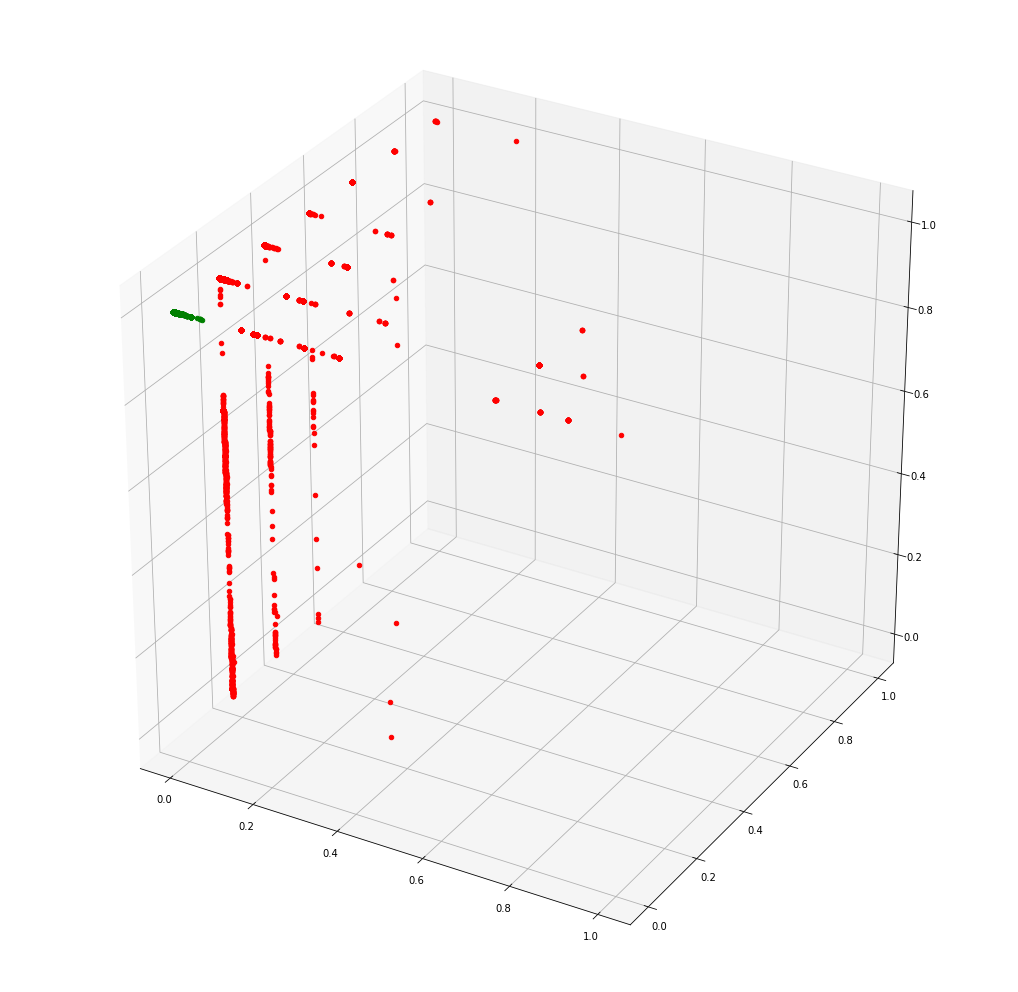

In [ ]:
labels = cluster.labels_


colors = 10*['r','g','b','c','k','y','m']


fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(col1)):

    ax.scatter(col1[i], col2[i], col3[i], c=colors[labels[i]], marker='o')


# ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
#             marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

In [ ]:
# Join Labels to DF and view
Final_Labels = Final_DF.join(labels_Sr)
Final_Labels.head(10)

,VEHICLE_ID_NO,USDOT,CARRIER_NAME,CARRIER_STATE,No_Carriers_Per_Vehicle,Days_Between_OOSIncident_ISIncident,Incident_After_OOS,LEGAL_NAME_OS,ZIP_CODE,STATE_OS,CITY_OS,Distance_Between_IS_OOS,Labels
0,00000000000EB2677,606698,TRANSPORTES JD,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
1,1DW1A53246B849986,606698,TRANSPORTES JD,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
2,1DW1A53276B850002,606698,JESUS MANUEL DUARTE,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
3,1FUJBBCK56LU39668,606698,TRANSPORTES JD,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
4,1FUYDCYB0RH465304,606698,TRANSPORTES JD,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
5,1GRAA0620XB009456,606698,TRANSPORTES JD,CI,2,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,0
6,1GRAA0620XB157820,606698,JESUS MANUEL DUARTE,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
7,1GRAA0627PB087460,606698,TRANSPORTES JD,CI,2,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,0
8,1GRAA0627XB009423,606698,TRANSPORTES JD,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
9,1GRAA06281B180026,606698,TRANSPORTES JD,CI,1,800.0,0.0,TRANSPORTES EFREN PORRAS S DE RL DE CV,32674,CI,JUAREZ,687.211038,1
